In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import warnings
warnings.filterwarnings("ignore")

In [3]:
df_sales=pd.read_csv("e-comm.csv")

In [4]:
# Display the first few rows of the dataset
print("Dataset Overview:")
print(df_sales.head())

Dataset Overview:
  Sales_ID                           Date       Amount Region Category  Month
0     SAL1  2022-01-01 00:00:00.000000000  2498.160475  South    Books      1
1     SAL2  2022-01-01 17:30:25.250501002  4802.857226   East   Beauty      1
2     SAL3  2022-01-02 11:00:50.501002004  3927.975767  North   Beauty      1
3     SAL4  2022-01-03 04:31:15.751503006  3394.633937  North    Books      1
4     SAL5  2022-01-03 22:01:41.002004008  1624.074562  North    Books      1


In [13]:
# Summary information
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sales_ID  500 non-null    object 
 1   Date      500 non-null    object 
 2   Amount    500 non-null    float64
 3   Region    500 non-null    object 
 4   Category  500 non-null    object 
 5   Month     500 non-null    int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 23.6+ KB


In [6]:
# Summary Statistics
print("\nSummary Statistics:")
print(df_sales.describe())



Summary Statistics:
            Amount       Month
count   500.000000  500.000000
mean   2994.246849    6.510000
std    1194.753634    3.449885
min    1020.246335    1.000000
25%    1965.118763    4.000000
50%    3052.654993    7.000000
75%    4024.499526    9.250000
max    4971.859184   12.000000


### Summary Statistics:

###### >The average sales amount is $3052.654, with a standard deviation of $1194.753


In [14]:
df_sales["Date"]=pd.to_datetime(df_sales["Date"])

In [23]:
df_sales.shape

(500, 6)

In [15]:
# Data Types
print("\nData Types:")
print(df_sales.dtypes)


Data Types:
Sales_ID            object
Date        datetime64[ns]
Amount             float64
Region              object
Category            object
Month                int64
dtype: object


#### Data visualization

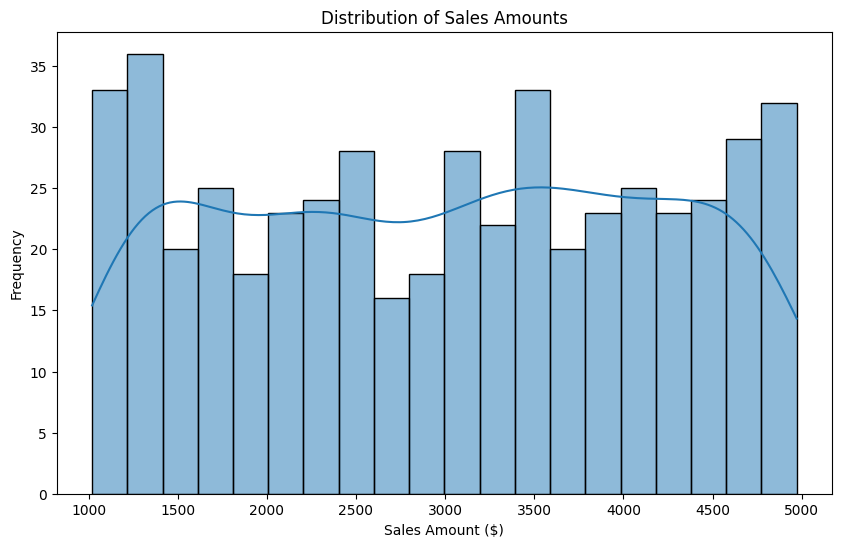

In [8]:
# Distribution of sales amounts
plt.figure(figsize=(10, 6))
sns.histplot(df_sales["Amount"], bins=20, kde=True)
plt.title("Distribution of Sales Amounts")
plt.xlabel("Sales Amount ($)")
plt.ylabel("Frequency")
plt.show()

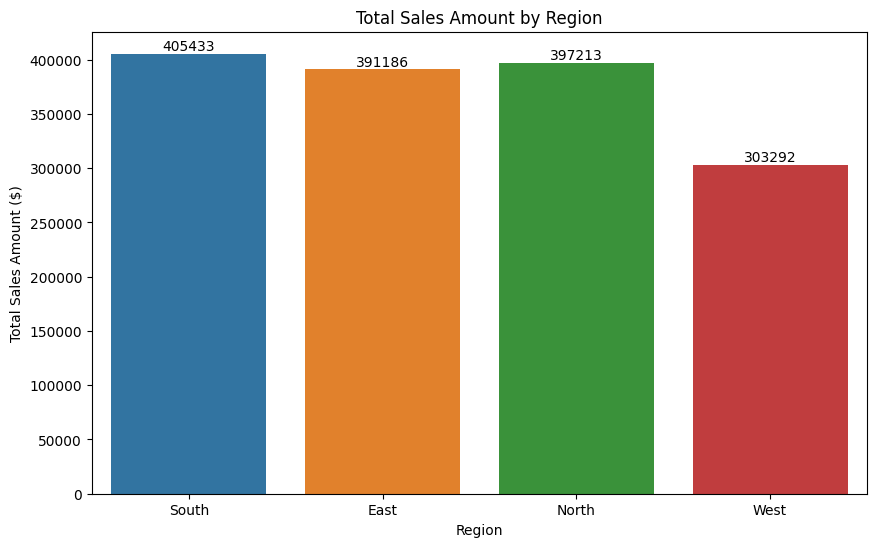

In [16]:
# Total sales amount by region
plt.figure(figsize=(10, 6))
ax=sns.barplot(x="Region", y="Amount", data=df_sales, estimator=sum, ci=None, hue="Region")
plt.title("Total Sales Amount by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales Amount ($)")
for i in ax.containers:
    ax.bar_label(i)
plt.show()

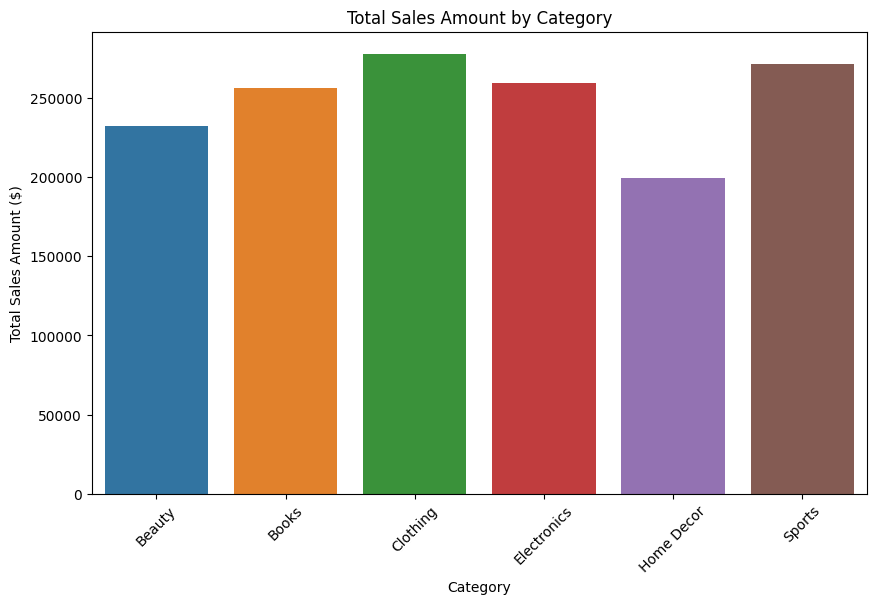

In [10]:
# Total sales amount by category
sales_by_category = df_sales.groupby("Category")["Amount"].sum().reset_index()
plt.figure(figsize=(10, 6))
ax=sns.barplot(x="Category", y="Amount", data=sales_by_category, hue="Category")
plt.title("Total Sales Amount by Category")
plt.xlabel("Category")
plt.ylabel("Total Sales Amount ($)")
plt.xticks(rotation=45)

plt.show()

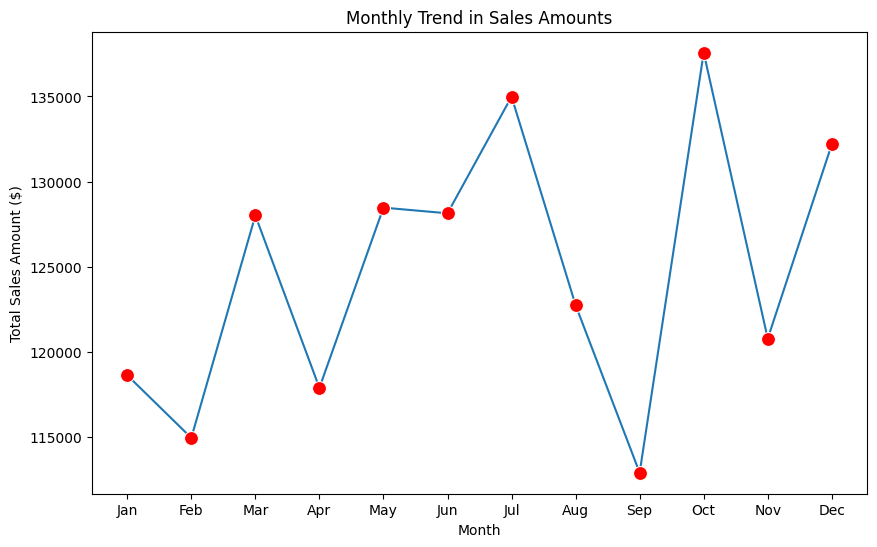

In [17]:
# Monthly trend in sales amounts
df_sales["Month"] = df_sales["Date"].dt.month
plt.figure(figsize=(10, 6))
sns.lineplot(x="Month", y="Amount", data=df_sales, estimator=sum, ci=None, marker="o",markersize=10, markerfacecolor="red")
plt.title("Monthly Trend in Sales Amounts")
plt.xlabel("Month")
plt.ylabel("Total Sales Amount ($)")
plt.xticks(ticks=np.arange(1, 13), labels=[calendar.month_abbr[i] for i in range(1, 13)])
plt.show()

Monthly trend analysis reveals a seasonal pattern in sales, with peak sales occurring in December and June.
Sales performance varies by region and category, suggesting potential opportunities for targeted marketing or product promotion strategies.

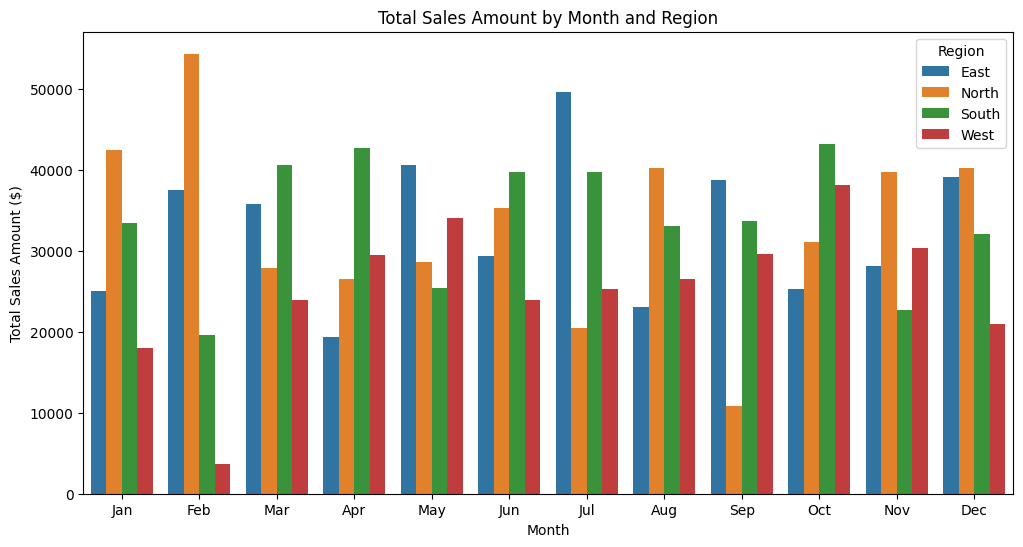

In [22]:
# Sales Performance by Month and Region
sales_by_month_region = df_sales.groupby([df_sales["Date"].dt.month, "Region"])["Amount"].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x="Date", y="Amount", data=sales_by_month_region, estimator=sum, ci=None, hue="Region")
plt.title("Total Sales Amount by Month and Region")
plt.xlabel("Month")
plt.ylabel("Total Sales Amount ($)")
plt.xticks(ticks=np.arange(0, 12), labels=[calendar.month_abbr[i] for i in range(1, 13)])  # Use calendar.month_abbr
plt.legend(title="Region")
plt.show()

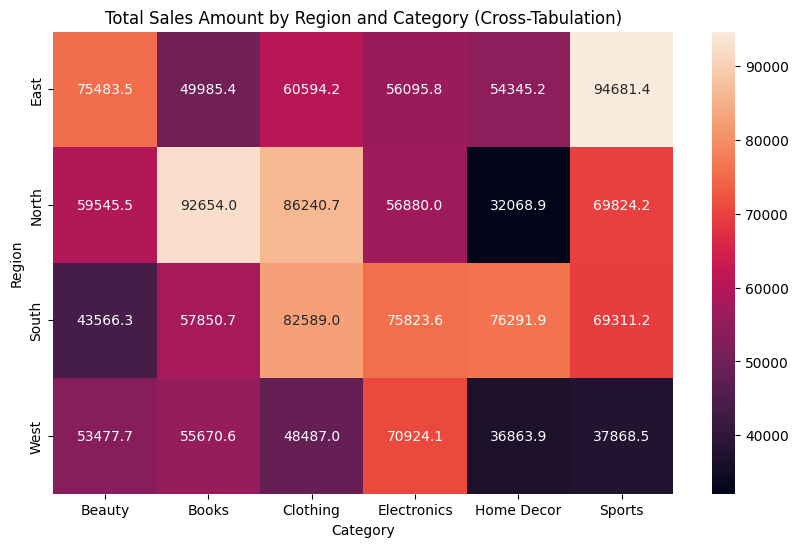

In [19]:
# Cross-tabulation for sales performance by region and category
cross_tab_sales_region_category = pd.crosstab(df_sales["Region"], df_sales["Category"], values=df_sales["Amount"], aggfunc=np.sum)
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab_sales_region_category, annot=True, fmt=".1f")
plt.title("Total Sales Amount by Region and Category (Cross-Tabulation)")
plt.xlabel("Category")
plt.ylabel("Region")
plt.show()

In [20]:
# Statistical test for comparing sales performance between two regions (e.g., North and South)
from scipy import stats
sales_north = df_sales[df_sales["Region"] == "North"]["Amount"]
sales_south = df_sales[df_sales["Region"] == "South"]["Amount"]
t_stat, p_value = stats.ttest_ind(sales_north, sales_south)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: -0.4205128141207929
P-value: 0.674445356143915


Overall, the analysis provides valuable insights into sales performance trends and highlights opportunities for strategic decision-making to optimize revenue generation. By leveraging the identified trends and targeting high-potential regions and categories, the company can enhance its sales strategies and achieve sustainable growth.